In [20]:
import cv2 as cv
import pytesseract
from typing import OrderedDict
import matplotlib.pyplot as plt



In [21]:
image_data = pytesseract.image_to_data(img, output_type = pytesseract.Output.DICT,config="--psm 6")
print(image_data["text"])


['', '', '', '', 'pO', 'oe', '.', '.', '|', '', '840', 'Wood.', 'Street', '', 'IL', 'UNIVERSITY', 'OF', 'ILLINOIS', '_', 'Rook', 'ahi', 's6', '', 'lr', 'Hospital', '&', 'Health', 'Sciences', 'System', 'Chicago,', 'Illinois', '60612', '', ':', '"', 'Ph', '#', '(877)FOR-LABS', '', 'Medical', 'Center', 'R24-041', '5622.', 'CLIA', 'ID#', '1400664392', '', 'CAP', 'LAP#', '1889701', '', '|', 'Reference', 'Laboratory', 'Frederick', 'Behm,', 'MD', '', 'ae', 'Clinical', 'Medical', 'Director', '', 'Clinical', 'Laboratory', 'Requisition', '', '|', 'PATIENT', 'LAST', 'NAME', 'FIRST', 'NAME', 'MI', 'MRN', 'SSN', 'DOB', '.', '', 'Luster', 'MARK', '821256', '09/22/1970', ':', '', 'ADDRESS', 'HOME', 'PHONE', 'WORK', 'PHONE', 'SEX', '~', '', 'M', '', 'CITY,', 'STATE,', 'ZIP', 'GUARANTOR', '', 'TT', 'a', 'eee', '', 'PHYSICIAN', 'CLINIC.', 'LOCATION', 'CODE', 'BILL', 'TO', '', 'Wilson,', 'Rick', 'DHS', '/', 'Alton', 'Mental', 'Heaith', 'A130', 'PROVIDER', '!', '', ';', 'Center', '', 'COLLECTED', 'DATE', 

In [22]:
key_vals = ["PATIENT","FIRST"]

In [13]:
# text=[]
# line_num=[]
# output=[]
# for i in image_data["text"]:
#     text.append(i)
    
# for j in image_data["line_num"]:
#     line_num.append(j)
    
# new_list=zip(line_num,text)
# for i in new_list:
# #     print(i)
#     if i[0]>= 0:
#         output.append(i[1])
        
# # print(output)
# new=" ".join(output)
# print(new)
    
    

patient = PATIENT LAST NAME Luster 
first = FIRST NAME MARK 


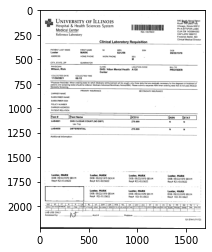

In [27]:
img = cv.imread('/home/yugabharathi/Videos/Zoning Method/UIC.TIF')
plt.imshow(img)
to_find = key_vals[0]


for key in key_vals:
    to_find = key.lower()
    found_val = ""
    for i in range(len(image_data['text'])):
        if to_find in image_data['text'][i].lower():
            x,y,w,h = image_data['left'][i], image_data['top'][i], image_data['width'][i], image_data['height'][i]
            if to_find == "DAte":
                zoning_area = (x-10,y-20,x+w+10,h+y+20)
#             elif to_find == "4":
#                 zoning_area = (x-30,y-50,x+w+700,h+y+40)
#             elif to_find=="Date":
                
#                 zoning_area = (x-60,y-10,x+w+100,h+y+10)
            
            else:
                zoning_area = (x-15,y-10,x+w+150,h+y+50)
            cv.rectangle(img, (zoning_area[0], zoning_area[1]), (zoning_area[2],zoning_area[3]), (0,255,0), 3)
            break


    for i in range(len(image_data['text'])):
        x,y,w,h = image_data['left'][i], image_data['top'][i], image_data['width'][i], image_data['height'][i]
        if x>=zoning_area[0] and y >= zoning_area[1] and x+w<=zoning_area[2] and h+y<zoning_area[3]:
            found_val += image_data['text'][i]+" "

    print(f"{to_find} = {found_val}")
# cv.imshow("ABC", img)
# cv.waitKey(0)
# cv.imwrite("ABC.Jpeg",img)

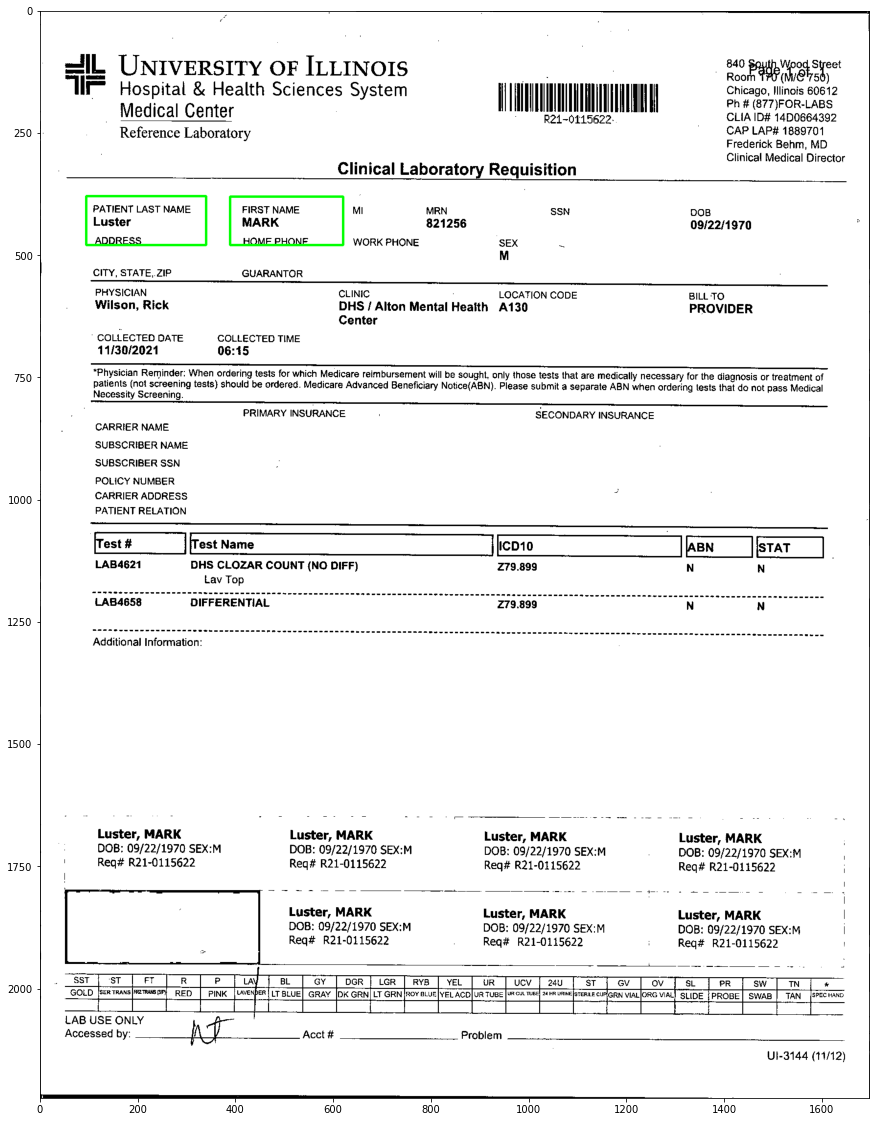

In [28]:
plt.figure(figsize=(30,20))
plt.imshow(img)

In [7]:
import cv2 as cv
import pytesseract 
from typing import OrderedDict, Pattern
import re
import json
from math import ceil
from pdf2image import convert_from_path
import os

def get_zoning_area_for_date(sub_labels, image_data, x,y,r,b, ):

    for z,k in enumerate(range(len(sub_labels))):
            
            # print(g,z,"---",sub_labels[k])
            # print(x,y,r,b)

            if type(sub_labels[k]) == tuple:
                y_cords = -5
                the_label = ""
                for i in range(len(image_data['text'])):
                    if sub_labels[k][0].lower() == image_data['text'][i].lower() and not (x and y) and y_cords < 0 and the_label == "":
                            the_label = sub_labels[k][0] # Invoice
                            y_cords = image_data['top'][i] # 256
                            # print(image_data['text'][i])
                            x,y = image_data['left'][i], image_data['top'][i]
                            # print("x|y",x,y)
                            # cv.putText(color, f"{image_data['text'][i]}", (x,y),cv.FONT_HERSHEY_PLAIN,1, (0,0,255), 2,2)
                            

                    elif image_data['top'][i] in [i for i in range(y_cords-5, y_cords+5)] and image_data['text'][i].lower() != the_label.lower() and not (r or b) and sub_labels[k][-1].lower() == image_data['text'][i].lower():
                        # print("Text",image_data['text'][i])
                        # print("TOP",image_data['top'][i])
                        r,b  = image_data['left'][i]+image_data['width'][i], image_data['top'][i]+image_data['height'][i]
                        # print("r|b",r,b)
                        
                        zoning_area = x-100,y-100,ceil(r*2.5),b+200
                        break
            
            
            elif type(sub_labels[k]) == str and not(r or b):
                # print("Str")
                for i in range(len(image_data['text'])):
                    if sub_labels[k].lower() == image_data['text'][i].lower():
                        # print(sub_labels[k])
                        x,y,r,b = image_data['left'][i], image_data['top'][i], image_data['left'][i]+image_data['width'][i], image_data['height'][i]+image_data['top'][i]
                        zoning_area = x-2*image_data['width'][i],y-100,ceil(r*2.5),b+200
                        
                        
                        break
    # cv.imwrite('xyz.jpg', image)
    return zoning_area
    

# all_files = os.listdir('.')
# for file_name in  all_files:
#     if file_name.endswith('.pdf'):
#         pdf_name = file_name
#         pages = convert_from_path(pdf_name, 500)

#         for i,page in enumerate(pages):
#             page.save(f"{pdf_name.split('.')[0]}_page_{i}.png")

attribute_dict = OrderedDict({
    'Invoice Date':{
        'labels':[('Invoice', 'Date'), ('Date')],
        # [iI]nvoice\s?[dD]ate
        # ([iI]?n?v?o?i?c?e?\s?[dD]ate).*?(\d{1,2}[\/\-\.]\d{1,2}[\/\-\.]\d{2,4})\s?[dD]?u?e?
        # ([\w\s]*?\s?[dD]ate).*?(\d{1,2}[\/\-\.]\d{1,2}[\/\-\.]\d{2,4})\s?[dD]?u?e?
        'regex_ptr':r'([iI]?[Nn]?[Vv]?[Oo]?[Ii]?[Cc]?[Ee]?\s?[dD][Aa][Tt][Ee]).*?(\d{1,2}[\/\-\.]\d{1,2}[\/\-\.]\d{2,4})\s?[dD]?u?e?'
    }
})

all_png_files = [png for png in os.listdir('.') if png.endswith('.png')]
print(all_png_files)

# to_try = all_png_files[-1]
for to_try in all_png_files:
# to_try = 'one.png'
    print(f"\n[+] Strated for {to_try} [+]")
    img = cv.imread(to_try)
    color = img
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    image_data = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)
    # print(image_data['text'])

    for g,attribute in enumerate(attribute_dict.keys()):
        temp_text = ""
        sub_labels = attribute_dict[attribute]['labels']
        # possible_lables
        # print(sub_labels)
        x,y,r,b = None,None,None,None
        zoning_area = get_zoning_area_for_date(sub_labels, image_data, x,y,r,b)
        # cv.rectangle(color, (zoning_area[0],zoning_area[1]), (zoning_area[2],zoning_area[3]), (0,0,255), 3)
        # cv.imwrite(f"{to_try.split('.')[0]}_DateArea.jpeg", color)


    for i in range(len(image_data['text'])):
        x,y,r,b = image_data['left'][i], image_data['top'][i], image_data['left'][i]+image_data['width'][i], image_data['top'][i]+image_data['height'][i]
        if x>=zoning_area[0] and y>=zoning_area[1] and r<=zoning_area[2] and b<=zoning_area[3]:
            temp_text += (image_data['text'][i])+' '
    
    temp_text = ' '.join(temp_text.split())
    print(temp_text)
    xyz = re.findall(attribute_dict[attribute]['regex_ptr'], temp_text)
    print(xyz)
        

    # get_me_vals(xyz, attribute_dict[attribute])

['IMAGE.png', 'table_thresh.png', 'gray_amazon.png', 'amazon.png']

[+] Strated for IMAGE.png [+]
New York _ Violation OF THE DATE OF THIS AND INTEREST BE BOOTED OR TOWED. Rev. 08/17 NS=Not Shown NiA=Not Applicable Type N/A If not present:
[]

[+] Strated for table_thresh.png [+]
Date of Assessment (d) 11/02/2015 11/02/2015 11/02/2015 Last Day for Unpaid Balance Refiling of Assessment fe} (f} 12/02/2025 1934.88 12/02/2025 3098.94 12/02/2025 2166.40 2047.09
[('Date', '11/02/2015')]

[+] Strated for gray_amazon.png [+]


UnboundLocalError: local variable 'zoning_area' referenced before assignment

In [ ]:
# get_zoning_area_for_date(sub_labels, image_data, x,y,r,b, )

In [ ]:
img = cv2.imread("samples/")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]custom_config = r'-l eng --oem 1 --psm 6 '
d = pytesseract.image_to_data(thresh, config=custom_config, output_type=Output.DICT)
df = pd.DataFrame(d)df1 = df[(df.conf != '-1') & (df.text != ' ') & (df.text != '')]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)sorted_blocks = df1.groupby('block_num').first().sort_values('top').index.tolist()
for block in sorted_blocks:
    curr = df1[df1['block_num'] == block]
    sel = curr[curr.text.str.len() > 3]
# sel = curr
    char_w = (sel.width / sel.text.str.len()).mean()
    prev_par, prev_line, prev_left = 0, 0, 0
    text = ''
    for ix, ln in curr.iterrows():
# add new line when necessary
        if prev_par != ln['par_num']:
            text += '\n'
            prev_par = ln['par_num']
            prev_line = ln['line_num']
            prev_left = 0
        elif prev_line != ln['line_num']:
            text += '\n'
            prev_line = ln['line_num']
            prev_left = 0 added = 0 # num of spaces that should be added
        if ln['left'] / char_w > prev_left + 1:
            added = int((ln['left']) / char_w) - prev_left
            text += ' ' * added
            text += ln['text'] + ' '
            prev_left += len(ln['text']) + added + 1
            text += '\n'
    print(text)



In [ ]:
import cv2
import pytesseract
from pytesseract import Output
import pandas as pd

img = cv2.imread("samples/page435.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

custom_config = r'-l eng --oem 1 --psm 6 '
d = pytesseract.image_to_data(thresh, config=custom_config, output_type=Output.DICT)
df = pd.DataFrame(d)

df1 = df[(df.conf != '-1') & (df.text != ' ') & (df.text != '')]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sorted_blocks = df1.groupby('block_num').first().sort_values('top').index.tolist()
for block in sorted_blocks:
    curr = df1[df1['block_num'] == block]
    sel = curr[curr.text.str.len() > 3]
    # sel = curr
    char_w = (sel.width / sel.text.str.len()).mean()
    prev_par, prev_line, prev_left = 0, 0, 0
    text = ''
    for ix, ln in curr.iterrows():
        # add new line when necessary
        if prev_par != ln['par_num']:
            text += '\n'
            prev_par = ln['par_num']
            prev_line = ln['line_num']
            prev_left = 0
        elif prev_line != ln['line_num']:
            text += '\n'
            prev_line = ln['line_num']
            prev_left = 0

        added = 0  # num of spaces that should be added
        if ln['left'] / char_w > prev_left + 1:
            added = int((ln['left']) / char_w) - prev_left
            text += ' ' * added
        text += ln['text'] + ' '
        prev_left += len(ln['text']) + added + 1
    text += '\n'
    print(text)

In [ ]:
imagt_to_string=pytesseract.image_to_string(thresh,config="--psm 6")
print(imagt_to_string)
text = "".join(imagt_to_string)
print(text)

In [ ]:
pattern = re.compile(r'Total:\s\d+\.\d+')
regex=re.findall(pattern,text)
print(regex)

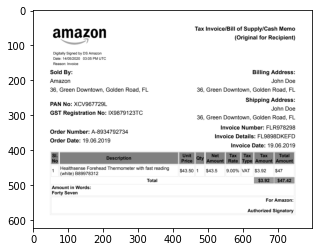

In [19]:
plt.imshow(img)

In [6]:
import cv2
image = cv2.imread("REF1-070821-14-13/REF1-070821-14-13_13016.TIF")

In [7]:
x=160
y=1718

imageRectangle = image.copy()
rect=cv2.rectangle(image, (-10+x ,y+50), (x+150, y+20), (0, 0, 0), thickness=-1, lineType=cv2.LINE_8)

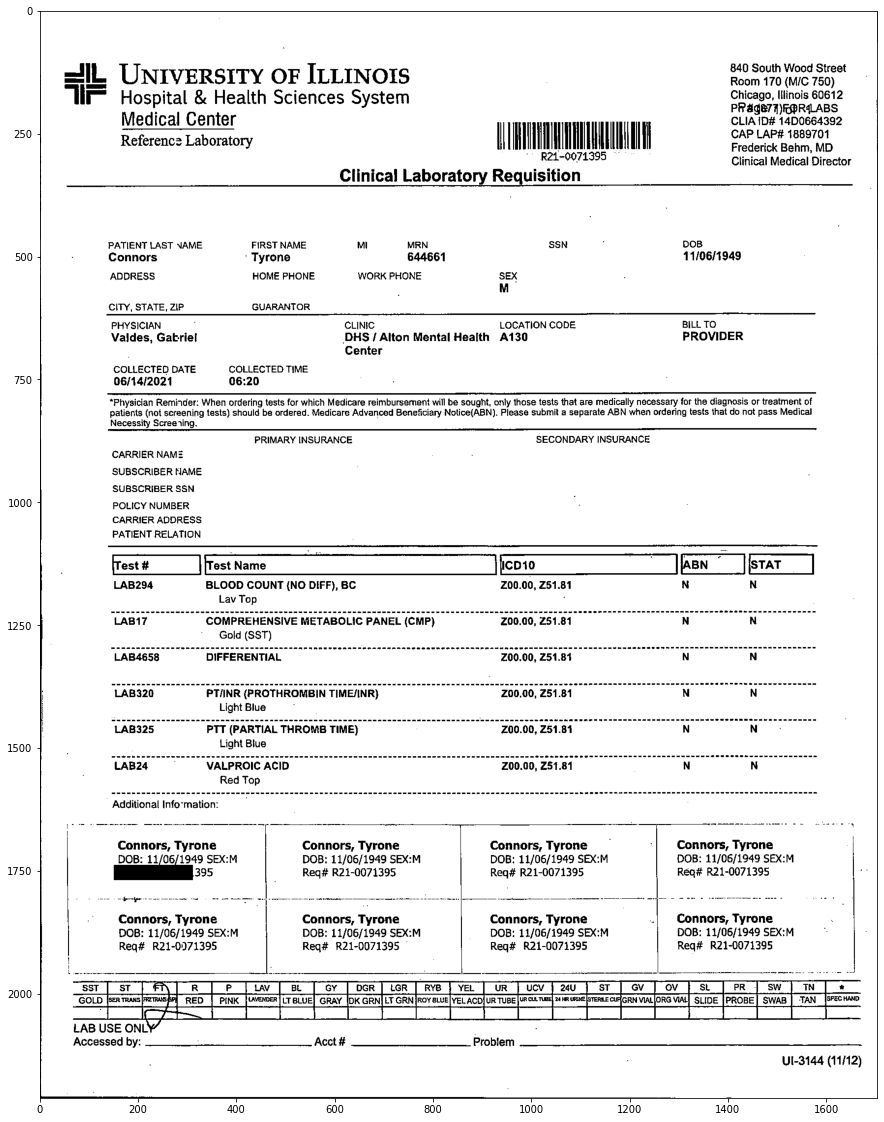

In [8]:
plt.figure(figsize=(30,20))
plt.imshow(image)
